In [1]:
import pandas as pd
import subprocess
import os
import numpy as np
from datetime import datetime
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe



In [2]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

sns.set(style="darkgrid")

# Covid-19 Confimed Data Analysis (India, Italy, Germany)

GITHUB_URL = https://github.com/CSSEGISandData/COVID-19.git


# Delivery 1- Figure 1The relative cases overtime of Covid infectors (absolut Covid cases/population size)

In [66]:
#Reading the CSV file from the above given link
data_path= r"C:\Users\Aravind\Desktop\Data Science\My Notebook\ds_covid-19\data\raw\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv"
data_raw= pd.read_csv(data_path)

In [67]:
#returns the first 5 rows
data_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22,5/13/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,178901,178905,178919,178922,178981,179010,179017,179131,179169,179203
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275211,275266,275310,275341,275366,275372,275416,275440,275485,275534
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265782,265786,265791,265794,265798,265800,265804,265806,265808,265814
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,41717,41717,41717,41717,41717,41717,41717,41717,42156,42156
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


In [68]:
#Automation of current data
git_pull = subprocess.Popen( "/usr/bin/git pull" , 
                     cwd = os.path.dirname( '../data/raw/COVID-19/' ), 
                     shell = True, 
                     stdout = subprocess.PIPE, 
                     stderr = subprocess.PIPE )
(out, error) = git_pull.communicate()

In [69]:
#slicing to required columns
time_index = data_raw.columns[4:]

In [70]:
#creating a new dataframe
df_plot = pd.DataFrame({
    'date':time_index})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [71]:
#returns the list of countries
data_raw['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [72]:
#slicing data of required countries
data_raw[data_raw['Country/Region']=='India'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [73]:
#list of required countries
country_list=['India',
              'Italy',
            'Germany',] 

In [74]:
#addig each country and its values to the df_plot dataframe
for each in country_list:
    df_plot[each]=np.array(data_raw[data_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [75]:
df_plot.head()

,date,India,Italy,Germany
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0


In [76]:
#Dividing each confirmed cases with population of that particular country
df_plot['India'] = df_plot['India'].div(1380000000)
df_plot['Italy'] = df_plot['Italy'].div(59550000)
df_plot['Germany'] = df_plot['Germany'].div(83240000)


In [77]:
df_plot

,date,India,Italy,Germany
0,1/22/20,0.000000,0.000000,0.000000
1,1/23/20,0.000000,0.000000,0.000000
2,1/24/20,0.000000,0.000000,0.000000
3,1/25/20,0.000000,0.000000,0.000000
4,1/26/20,0.000000,0.000000,0.000000
...,...,...,...,...
838,5/9/22,0.031237,0.282392,0.305224
839,5/10/22,0.031240,0.283335,0.306390
840,5/11/22,0.031242,0.284052,0.307458
841,5/12/22,0.031244,0.284715,0.308287


Text(0, 0.5, 'Confirmed Cases')

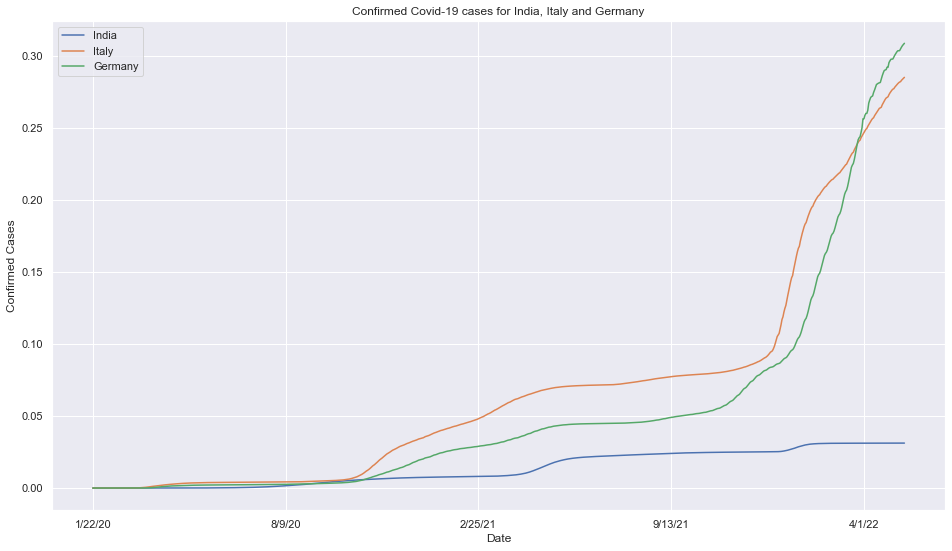

In [78]:
#Plotting the dataframe
final_plot=df_plot.set_index('date').plot(title='Confirmed Covid-19 cases for India, Italy and Germany')
final_plot.set_xlabel("Date")
final_plot.set_ylabel("Confirmed Cases")

# Vaccination Data Analysis (Canada, France, India)

Github Link= https://github.com/govex/COVID-19.git

# Delivery 2 - Figure 2 The vaccination rate (percentage of the population) over time

In [17]:
#reading the CSV file
vac_data=r"C:\Users\Aravind\Desktop\Data Science\My Notebook\ds_covid-19\data\raw\COVID-19_Vaccination\COVID-19\data_tables\vaccine_data\global_data\time_series_covid19_vaccine_global.csv"
vac_data= pd.read_csv(vac_data)

In [5]:
vac_data.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
0,Canada,2020-12-14,5.0,0.0,0.0,2020-12-14,124.0,NaN
1,World,2020-12-14,5.0,0.0,0.0,2020-12-14,NaN,NaN
2,Canada,2020-12-15,723.0,0.0,0.0,2020-12-15,124.0,NaN
3,China,2020-12-15,1500000.0,0.0,0.0,2020-12-15,156.0,NaN
4,Russia,2020-12-15,28500.0,28500.0,0.0,2020-12-15,643.0,NaN


In [18]:
#Renaming and deleting unwanted columns
df1= vac_data.drop(['Doses_admin', 'People_partially_vaccinated', 'Report_Date_String', 'UID', 'Province_State'], axis=1, inplace=True)
df2=vac_data.rename(columns={'Country_Region': 'Country', 'People_fully_vaccinated': 'Vaccindated_People'})

In [20]:
df2.head()

,Country,Date,Vaccindated_People
0,Canada,2020-12-14,0.0
1,World,2020-12-14,0.0
2,Canada,2020-12-15,0.0
3,China,2020-12-15,0.0
4,Russia,2020-12-15,0.0


In [8]:
#India's vaccinated people per population
df_India = df2[df2["Country"] == 'India'].copy()
df_India['Vaccindated_People'] = df_India['Vaccindated_People'].div(1380000000)

In [9]:
#France's vaccinated people per population
df_France = df2[df2["Country"]=='France'].copy()
df_France['Vaccindated_People'] = df_France['Vaccindated_People'].div(67390000)

In [10]:
#Canada's vaccinated people per population
df_Canada = df2[df2["Country"]=='Canada'].copy()
df_Canada['Vaccindated_People'] = df_Canada['Vaccindated_People'].div(38010000)

In [11]:
#Deleting the NaN values from the three countries
canada = df_Canada.dropna()
france = df_France.dropna()
india = df_India.dropna()

In [12]:
#creating a list of the three countries
df_country = [canada, france, india]

In [21]:
#Merging the three countries to a single dataframe using concat method
final_df = pd.concat(df_country).reset_index(drop=True)

In [22]:
#final dataframe
final_df

,Country,Date,Vaccindated_People
0,Canada,2020-12-14,0.000000
1,Canada,2020-12-15,0.000000
2,Canada,2020-12-16,0.000000
3,Canada,2020-12-17,0.000000
4,Canada,2020-12-18,0.000000
...,...,...,...
1613,India,2022-06-17,0.655088
1614,India,2022-06-18,0.655818
1615,India,2022-06-19,0.656347
1616,India,2022-06-20,0.656563


In [15]:
#Converting the date format
final_df['Date'] =  pd.to_datetime(final_df['Date'], format='%Y-%m-%d')

In [23]:
#Plotting the Graph of the three countries 
plot = pe.line(final_df, x="Date", y="Vaccindated_People", color = 'Country', title='Vaccination Rate per population of Canada, France and, India')
plot.show()

# End of First delivery